# Sistemas Inteligentes

## Laboratório 4 - Clusterização

Algoritmos de Clusterização 
- k-means
- Affinity Propagation

Aplicação em compressão de imagens



### Identificação do Aluno

#### Nome Completo

Matheus Prudencio dos Santos

#### RA

11114014

## Importação e preparação dos dados

In [1]:
%matplotlib inline

In [2]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import *
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AffinityPropagation
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [3]:
%config InlineBackend.figure_format = 'svg'

params = {'figure.figsize': [5, 5],
          'axes.labelsize': 16,
          'axes.titlesize':18,
          'font.size': 16,
          'legend.fontsize': 10,
          'xtick.labelsize': 12,
          'ytick.labelsize': 12
    }

plt.rcParams.update(params)

Carregue a base de dados IRIS, então efetue uma redução de dimensionalidade utilizando PCA com 2 componentes. Por fim, faça um Holdout dos dados para separar dados de treino e teste; utilize 20% para teste e faça o embaralhamento dos dados nesse processo.

In [4]:
dataset = load_iris()

x = dataset.data

y = dataset.target

pca = PCA(n_components=2)

pca = pca.fit_transform(x)

x_treinamento, x_teste, y_treinamento, y_teste = tts(pca,y,test_size =0.20, shuffle = True)



## Clusterização 

Calcule os centróides de cada grupo (considere 3 grupos) para os dados de treino.

In [5]:
c0=[]; c1=[]; c2=[]
for i in range(y_treinamento.shape[0]):
    if y_treinamento[i] == 0:
        c0.append(x_treinamento[i])
    elif y_treinamento[i] == 1:
        c1.append(x_treinamento[i])
    else:
        c2.append(x_treinamento[i])
        
c0=np.array(c0)
c1=np.array(c1)
c2=np.array(c2)
        
c0_cm = np.array([np.mean(c0[:,0]), np.mean(c0[:,1])])
c1_cm = np.array([np.mean(c1[:,0]), np.mean(c1[:,1])])
c2_cm = np.array([np.mean(c2[:,0]), np.mean(c2[:,1])])

cm = np.vstack((c0_cm, c1_cm, c2_cm))
cm

array([[-2.63871644,  0.24903257],
       [ 0.58639137, -0.19996875],
       [ 2.05475478,  0.05101896]])

Exiba o gráfico de dispersão para os dados de treinamento com seus respectivos centróides. Lembre-se de utilizar os eixos da transformação do PCA e, também, de utilizar os valores dos alvos (y) como base para definir de qual cor será cada amostra representada no gráfico.

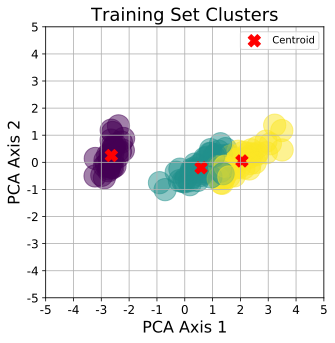

In [6]:
plt.figure()
plt.scatter(x=x_treinamento[:, 0], y=x_treinamento[:, 1], c=y_treinamento, cmap='viridis', s=500, alpha=0.5)
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.xticks(range(-5,6), ['-5','-4','-3','-2','-1','0','1','2','3','4','5'])
plt.yticks(range(-5,6), ['-5','-4','-3','-2','-1','0','1','2','3','4','5'])
plt.xlabel('PCA Axis 1')
plt.ylabel('PCA Axis 2')
plt.title('Training Set Clusters')
plt.grid(True)

plt.scatter(x=cm[:,0], y=cm[:,1], c='r', s=150, marker='X', label='Centroid')
plt.legend()

## Algoritmo K-MEANS

Agora crie um objeto de agrupamento com a função KMeans; utilize 3 grupos e já faça o ajuste (fit) com base nos dados de entrada de treinamento. Ainda na mesma célula, faça a predição com base nos dados de entrada de teste.

In [7]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(x_treinamento)

previsao = kmeans.predict(x_teste)

previsao

array([2, 1, 1, 2, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 2, 1, 0, 1, 0, 2, 1,
       0, 0, 1, 1, 2, 0, 1, 2])

Exiba os centróides de cada grupo (dica: há um objeto da classe kmeans para isso)

In [8]:
centroides = kmeans.cluster_centers_
centroides

array([[ 2.28495213,  0.28537964],
       [-2.63871644,  0.24903257],
       [ 0.72361894, -0.28642882]])

Mostre a inércia do modelo (dica: há um objeto da classe kmeans para isso)

In [9]:
kmeans.inertia_

49.93036889326747

Tal como havia sido feito para os dados de treinamento, exiba o gráfico de dispersão, mas agora utilizando amostras de teste e utilizando as predições do kmeans para determinar as cores de cada amostra.

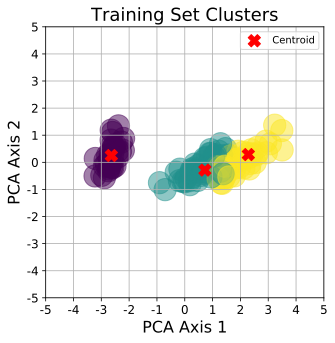

In [10]:
plt.figure()
plt.scatter(x=x_treinamento[:, 0], y=x_treinamento[:, 1], c=y_treinamento, cmap='viridis', s=500, alpha=0.5)
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.xticks(range(-5,6), ['-5','-4','-3','-2','-1','0','1','2','3','4','5'])
plt.yticks(range(-5,6), ['-5','-4','-3','-2','-1','0','1','2','3','4','5'])
plt.xlabel('PCA Axis 1')
plt.ylabel('PCA Axis 2')
plt.title('Training Set Clusters')
plt.grid(True)

plt.scatter(x=centroides[:,0], y=centroides[:,1], c='r', s=150, marker='X', label='Centroid')
plt.legend()

## Algoritmo de Propagação de Afinidade

Gere um objeto de agrupamento com AffinityPropagation e faça o ajuste com base nas entradas de treinamento.

In [11]:
ap = AffinityPropagation()
ap.fit(x_treinamento)

AffinityPropagation(affinity='euclidean', convergence_iter=15, copy=True,
          damping=0.5, max_iter=200, preference=None, verbose=False)

Mostre os centróides dos grupos.

In [12]:
ap.cluster_centers_

array([[ 3.07652162,  0.68576444],
       [ 2.14498686,  0.13890661],
       [-2.50652679,  0.65193501],
       [ 0.22887905, -0.40225762],
       [ 1.04329778,  0.22895691],
       [ 1.37873698, -0.42120514],
       [-2.82089068, -0.08210451]])

Mostre os índices dos grupos.

In [13]:
ap.cluster_centers_indices_

array([ 12,  88,  89,  96, 109, 116, 118], dtype=int64)

Faça a predição com base nos dados de entrada de teste e ostre o resultado da predição.

In [14]:
previsao = ap.predict(x_teste)
previsao

array([4, 2, 6, 3, 6, 6, 2, 0, 6, 6, 1, 6, 0, 2, 6, 3, 6, 1, 2, 1, 3, 6,
       1, 1, 2, 6, 3, 0, 2, 3], dtype=int64)

Novamente, exiba o gráfico de espalhamento das amostras de entrada, mas agora colorindo-as com base nas predições (dos grupos a que pertencem) feitas pelo algoritmo de Affinity Propagation.

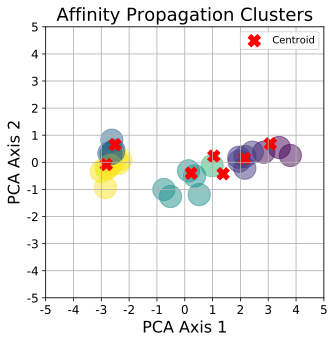

In [15]:
plt.figure()
plt.scatter(x=x_teste[:, 0], y=x_teste[:, 1], c=previsao, cmap='viridis', s=500, alpha=0.5)
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.xticks(range(-5,6), ['-5','-4','-3','-2','-1','0','1','2','3','4','5'])
plt.yticks(range(-5,6), ['-5','-4','-3','-2','-1','0','1','2','3','4','5'])
plt.xlabel('PCA Axis 1')
plt.ylabel('PCA Axis 2')
plt.title('Affinity Propagation Clusters')
plt.grid(True)

plt.scatter(x=ap.cluster_centers_[:,0], y=ap.cluster_centers_[:,1], c='r', s=150, marker='X', label='Centroid')
plt.legend()

## Aplicação - Compressão de Imagem

Defina a variável n_cores com a quantidade de cores desejada para a figura final, então importe uma figura (baixada do TIDIA), atribuindo-a à variável imagem. Depois, converta a figura para um array de tipo float64 com valores de 0 a 1. Por fim, exiba o formato da imagem.

In [29]:
n_cores =100
imagem = plt.imread('fish.jpg')

img_2 = imagem.copy()

print (img_2.shape)

img_2 = img_2.reshape(img_2.shape[0]*img_2.shape[1] , 3)

print (img_2.shape)

img_2 = np.array(img_2, dtype='float64')

scaler = MinMaxScaler()

img = scaler.fit(img_2)
img = scaler.transform(img_2)

(1786, 2176, 3)
(3886336, 3)


Exiba a imagem

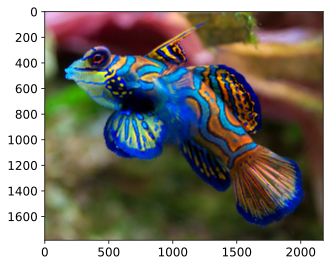

In [30]:
plt.imshow(imagem)

Modifique o formato da matriz correspondente à imagem para que a primeira dimensão refira-se à posição do pixel e a segunda dimensão refira-se à tríade de valores das camadas RGB.

In [31]:
img.shape

(3886336, 3)

Atribua à variável X uma versão "embaralhada" (shuffle) do array da imagem obtido após o reshape, mas selecione apenas os 1000 primeiros valores. Então, crie o objeto agrupador utilizando a função KMeans com o número de grupos igual ao número de cores. Por fim, efetue o ajuste com a função fit com base em X.

In [32]:
img_=[]
for x in range(1000):
    img_.append(img[x])

x = shuffle(img_)

x = np.array(x)

kmeans.fit(x)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

Realize uma predição com o agrupador kmeans, baseando-se no array da imagem e atribua o resultado à variável grupos.

In [33]:
grupos = kmeans.predict(img_)

Agora, atribua à variavel codebook_random uma nova versão embaralhada do array da imagem, mas selecione apenas a quantidade de valores que corresponda ao número de cores definido inicialmente. Ainda nesta célula, utilize a função pairwise_distances_argmin para selecionar os grupos aleatórios que minimizam as distâncias. Dica: para esta última função, utilize como argumentos: codebook_random, imagem_array e axis=0, nesta ordem.

In [34]:
codebook_random = shuffle(img)

codebook_random[10]

array([0.67843137, 0.50588235, 0.36862745])

In [ ]:
pairwise_distances_argmin(codebook_random, img, axis =0)

In [23]:
# Recria a imagem comprimida com base no Code Book e nos índices
def recria_imagem(codebook, grupos, w, h):
    d = codebook.shape[1]
    imagem = np.zeros((w, h, d))
    grupo_idx = 0
    for i in range(w):
        for j in range(h):
            imagem[i][j] = codebook[grupos[grupo_idx]]
            grupo_idx += 1
    return imagem

Utilizando uma célula para cada caso, exiba a imagem original, a imagem quantizada por K-Means e a imagem quantizada por distâncias aleatórias mínimas.

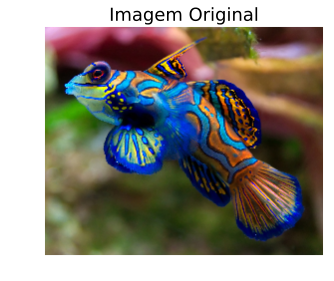

In [24]:
plt.figure(1)
plt.clf()
plt.axis('off')
plt.title('Imagem Original')
plt.imshow(imagem)

NameError: name 'w' is not defined

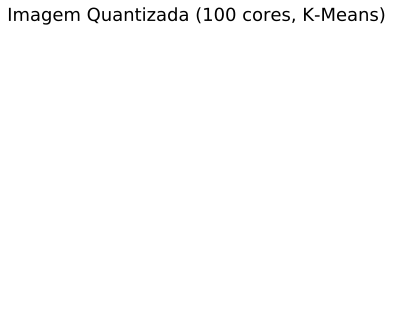

In [25]:
plt.figure(2)
plt.clf()
plt.axis('off')
plt.title('Imagem Quantizada (%d cores, K-Means)' % n_cores)
plt.imshow(recria_imagem(kmeans.cluster_centers_, grupos, w, h))

In [ ]:
### Escreva seu código aqui ###